# Bliskost-sličnost i različitost

1. **Sličnost**
 * Numerička mera koliko su dva objekta slična
 * Što dva objekta više liče jedan na drugi sličnost im je veca
 * Često se meri vrednostima u intervalu [0, 1]
  
  Kada koristimo?:
  - Pronalazak grešaka u podacima (nastalih npr. greškom u kucanju)
  - Pronalazak grupa koje su jako slične (klasteri)

2. **Različitost**
 * Numerička mera koliko su dva objekta različita
 * Što dva objekta više liče jedan na drugi različitost im je manja
 * Najmanja različitost je često 0; gornja granica varira
 * Kao sinonim koristi se i termin rastojanje
 
 Kada koristimo?
  - outlajere
  - izuzetke
  - granice klastera

3. **Blizina** (eng. proximity) označava ili sličnost ili različitost

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

### Mera sličnosti za nominalne atribute

$s(p, q) = \left\{ 
  \begin{array}{ c l }
    1 & \quad \textrm{ako } p = q \\
    0                 & \quad \textrm{inače}
  \end{array}
\right.$

In [2]:
def similarity_nominal(p, q): 
    return int(p==q)

In [3]:
similarity_nominal("Petar", "Jovan") # izlaz: 0

0

In [4]:
similarity_nominal("Petar", "Petar") # izlaz: 1

1

## Mera različitosti za nominalne atribute

$d(p, q) = \left\{ 
  \begin{array}{ c l }
    0 & \quad \textrm{ako } p = q \\
    1                 & \quad \textrm{inače}
  \end{array}
\right.$

In [5]:
def dissimilarity_nominal(p, q):
  return 1 - similarity_nominal(p, q)

In [6]:
dissimilarity_nominal("Petar", "Jovan") # izlaz: 1

1

In [7]:
dissimilarity_nominal("Petar", "Petar") # izlaz: 0

0

## Mera različitosti za ordinalne atribute

$
d(p, q) = \frac{|p'-q'|}{n-1}
$

Vrednost p i q slikaju u cele brojeve od 0 do n - 1, gde je n broj mogućih vrednosti 


In [8]:
def dissimilarity_ordinal(p, q, values):
    n = len(values)
    map_values = pd.Series(range(n), index=values)
    return abs(map_values[p] - map_values[q])/(n-1)

In [9]:
dissimilarity_ordinal("M", "XL", ["S", "M", "L", "XL"])  # izlaz: 0.6666666666666666

0.6666666666666666

In [10]:
dissimilarity_ordinal("S", "XL", ["S", "M", "L", "XL"])  # izlaz: 1.0

1.0

## Mera sličnosti za ordinalne atribute

$
s(p, q) = 1 - d(p, q)
$

In [11]:
def similarity_ordinal(p, q, values):
    return 1-dissimilarity_ordinal(p, q, values)

In [12]:
similarity_ordinal("M", "XL", ["S", "M", "L", "XL"])  # izlaz: 0.33333333333333337

0.33333333333333337

In [13]:
similarity_ordinal("S", "XL", ["S", "M", "L", "XL"])  # izlaz: 0.0

0.0

## Mere različitosti za kvantitativne atribute

$d(p, q) = |p-q| $

In [14]:
def dissimilarity_quantity(p, q):
    return abs(p-q)

In [15]:
import datetime
dissimilarity_quantity(datetime.date(2020, 3, 25), datetime.date(2020, 7, 24))

datetime.timedelta(days=121)

## Mere sličnosti - opcija 1

$s(p, q) = -d(p, q)$

In [16]:
def similarity_quantity_1(p, q):
    return -dissimilarity_quantity(p, q)

In [17]:
similarity_quantity_1(datetime.date(2020, 3, 25), datetime.date(2020, 7, 24))

datetime.timedelta(days=-121)

## Mere sličnosti - opcija 2

$s(p, q) = \frac{1}{1+d}$

In [18]:
def similarity_quantity_2(p, q):
    return 1/(1+dissimilarity_quantity(p, q).days)

In [19]:
similarity_quantity_2(datetime.date(2020, 3, 25), datetime.date(2020, 7, 24)) # 0.00819672131147541

0.00819672131147541

# Različitosti između objekata podataka


### Rastojanje Minkovskog:
$ mink(x, y) = (\sum_{k=1}^{n}|x_k-y_k|^r)^\frac{1}{r}$

 - r parametar
 - n broj dimenzija (atributa)
 - $x_k$ i $y_k$ su vrednosti k-tog atributa objekata x i y
 - indukovano je **p-normom**

Rastojanje Minkovskog

* **r = 1** Menhetn (L1 norma) rastojanje
    Hamingovo rastojanje
* **r = 2** Euklidsko rastojanje

* **r → ∞**  supremum (Lmax norma) rastojanje

> Predstavlja maksimum razlike između odgovarajucih komponenti vektora




 - $standardizacija$ - proces skaliranja podataka tako da imaju srednju vrednost nula i standardnu devijaciju jedan (standardna normalna raspodela) i ne garantuje nam fiksnost u nekom intervalu
 - $normalizacija$ - uklanja razlike u razmerama tako da se podaci skaliraju na određeni opseg, obično od 0 do 1 ili -1 do 1, kako bi se olakšalo poređenje između različitih atributa ili instanci

 - $diskretizacija$ - transformacija neprekidnog atributa u kategorički atribut
 - $binarizacija$ - transformacija atributa u jedan ili više binarnih atributa

In [20]:
def minkowski(x, y, r):
  if r <= 0:
    raise ValueError("R is not positive!")
  return (sum([abs(x[v] - y[v])**r for v in x.index])**(1/r))  

#### Zadatak 1:
Posmatramo naredni skup tačaka:

|point |x  | y|
--- | --- | ---|
|**p1**|0|2|
|**p2**|2|0|
|**p3**|3|1|
|**p4**|5|1|

Izračunati $L_1$, $L_2$, $L_{max}$ normu:

In [21]:
points = pd.DataFrame([[0,2], [2, 0], [3, 1], [5, 1]], index=["p1", "p2", "p3", "p4"], columns=["x", "y"])
points

,x,y
p1,0,2
p2,2,0
p3,3,1
p4,5,1


Text(0.5, 1.0, 'Points')

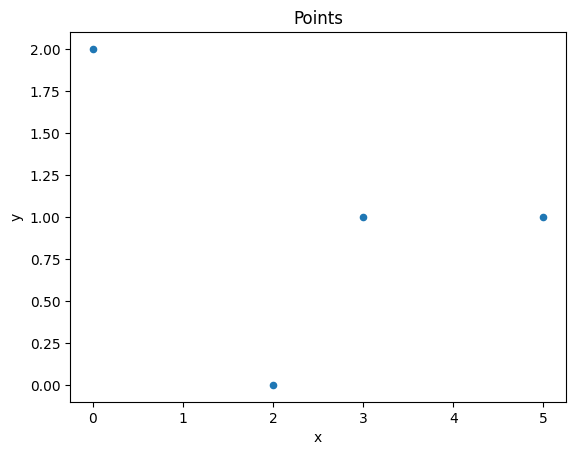

In [22]:
points.plot.scatter("x", "y")
plt.title("Points")


a) Izračunati L1 normu: 

Očekivan izlaz:

|$L_1$|p1| p2|p3|p4|
--- | --- | ---| ---|---|
|**p1**|0|4|4|6|
|**p2**|4|0|2|4|
|**p3**|4|2|0|2|
|**p4**|6|4|2|0|

In [23]:
def L1(points):
    L1 = pd.DataFrame(0, index=points.index, columns=points.index)
    for p1 in points.index:
      for p2 in points.index:
        L1[p1][p2] = minkowski(points.loc[p1], points.loc[p2], 1)
    return L1

L1(points)

,p1,p2,p3,p4
p1,0,4,4,6
p2,4,0,2,4
p3,4,2,0,2
p4,6,4,2,0


a) Izračunati L2 normu: 

Očekivan izlaz:

|$L_2$|p1| p2|p3|p4|
--- | --- | ---| ---|---|
|**p1**|0.0|2.828|3.162|5.099|
|**p2**|2.828|0.0|1.414|3.162|
|**p3**|3.162|1.414|0.0|2.0|
|**p4**|5.099|3.162|2.0|0.0|

In [24]:
def L2(points):
    L2 = pd.DataFrame(0, index=points.index, columns=points.index, dtype='float64')
    for p1 in points.index:
      for p2 in points.index:
        L2[p1][p2] = minkowski(points.loc[p1], points.loc[p2], 2)
    return L2
L2(points)

,p1,p2,p3,p4
p1,0.000000,2.828427,3.162278,5.099020
p2,2.828427,0.000000,1.414214,3.162278
p3,3.162278,1.414214,0.000000,2.000000
p4,5.099020,3.162278,2.000000,0.000000


a) Izračunati Lmax normu: 

Očekivan izlaz:

|$L_max$|p1| p2|p3|p4|
--- | --- | ---| ---|---|
|**p1**|0|2|3|5|
|**p2**|2|0|1|3|
|**p3**|3|1|0|2|
|**p4**|5|3|2|0|

In [25]:
def Lmax(points):
    Lmax = pd.DataFrame(0, index=points.index, columns=points.index)
    for p1 in points.index:
      for p2 in points.index:
        Lmax[p1][p2] = max(abs(points.loc[p1] - points.loc[p2]))
    return Lmax
Lmax(points)

,p1,p2,p3,p4
p1,0,2,3,5
p2,2,0,1,3
p3,3,1,0,2
p4,5,3,2,0


Domaći: Optimizovati implementaciju funkcija L1, L2, Lmax na osnovu činjenice da su rezultujuće matrice simetrične.

## Mere sličnosti za binarne podatke

* Hamingovo rastojanje
* Simple matching coefficient (SMC)
* Jacard's coefficient
* Cosine similarity

Oznake: Ako su p i q binarni podaci:

* $M_{00}$ - broj atributa koji su 0 u p i 0 u q
* $M_{01}$ - broj atributa koji su 0 u p i 1 u q
* $M_{10}$ - broj atributa koji su 1 u p i 0 u q
* $M_{11}$ - broj atributa koji su 1 u p i 1 u q


### Hamingovo rastojanje
- broj različitih vrednosti
- $mera$ $različitosti$


In [26]:
def hammings_distance(p, q):
  return (p != q).sum()

In [27]:
p = pd.Series([0, 1, 0, 1, 0, 1, 0, 0, 0, 1])
q = pd.Series([0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

hammings_distance(p, q) # izlaz: 3

3

### SMC
##### (Simple Matching Coefficient)
$SMC(p, q) = \frac{M_{00} + M_{11}}{M_{00} + M_{11} + M_{01} + M_{10}}$

- broj uparenih / broj ukupnih

In [28]:
def smc(p, q):
    return (p == q).sum() / p.count()

In [29]:
p = pd.Series([0, 1, 1, 0, 1, 0])
q = pd.Series([1, 0, 1, 0, 1, 0])

smc(p, q) # izlaz: 0.666666666666

0.6666666666666666

### Jacard's coefficient
- koristi se kod asimetricnih binarnih podataka
- $mera$ $sličnosti$

$ jacard(p, q) = \frac{M_{11}}{M_{11} + M_{01} + M_{10}}$

In [30]:
def jacard(p, q):
  return (p+q == 2).sum() / (p+q != 0).sum()

In [31]:
p = pd.Series([0, 1, 0, 1, 0, 1, 0, 0, 0, 1])
q = pd.Series([0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

jacard(p, q) # izlaz: 0.4


0.4

### Kosinusno rastojanje

$cos(p, q) = \frac{p ⊙ q}{|p||q|}$

- ⊙ - skalarni proizvod

- |p| - norma vektora p, označava dužinu vektora

- Koristi se kod asimetričnih podataka.

- Najčešća mere sličnosti dokumenata.


In [32]:
def norm(x):
  return np.sqrt((x*x).sum())

In [33]:
def cosine_similarity(p, q):
  return (p*q).sum() / (norm(p)*norm(q))

In [34]:
cosine_similarity(p, q) # izlaz: 0.5773502691896258

0.5773502691896258

### Korelacija:
$corr(p, q) = \frac{covariance(p, q)}{σ(p) * σ(q)}$

Korelacija dva objekta koji imaju binarne ili neprekidne atribute
je *mera linearnog odnosa između njihovih atributa*

In [35]:
def correlation(p, q):
  return (np.cov(p, q) / (p.std()*q.std()))[0][1]

In [36]:
correlation(p, q) # izlaz: 0.3563483225498993


0.3563483225498993